<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [416]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\anirb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Importing necessary libraries

In [417]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE



# Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    classification_report,
)
import random

# Library to avoid the warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [418]:
# Now let's import and put the train and test datasets in  pandas dataframe
folderPath = "."
data = pd.read_csv(folderPath + "/Churn.csv")

## Data Overview

In [419]:
data.shape

(10000, 14)

In [420]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [421]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 10,000  observations and 14 columns in the data.
* 3 columns are of the object datatype and rest columns are numerical.


In [422]:
data.duplicated().sum()

0

In [423]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [424]:
data = data.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

Dropping colmns RowNumber, CustomerID as these are identifiers
Surname should not have any impact on Exit Status

## Exploratory Data Analysis

In [425]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    (
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
        if bins
        else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [426]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [427]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """

    Print the category counts and plot a stacked bar chart


    data: dataframe

    predictor: independent variable

    target: target variable
    """
    data = data.sort_values(by=predictor)

    count = data[predictor].nunique()

    sorter = data[target].value_counts().index[-1]

    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

    print(tab1)

    print("-" * 120)

    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    plt.show()

In [428]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [429]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [430]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [431]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [432]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [433]:
df1 = data.copy()

In [434]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later

for colname in df1.dtypes[df1.dtypes == "object"].index:
    val_counts = df1[colname].value_counts(dropna=False)  # will also show the NA counts
    print(val_counts[:num_to_display])

    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("-" * 50, "\n")  # just for more space in between

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
-------------------------------------------------- 

Gender
Male      5457
Female    4543
Name: count, dtype: int64
-------------------------------------------------- 



### Univariate Analysis

In [435]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df1["Geography"] = label_encoder.fit_transform(df1["Geography"])
df1["Gender"] = label_encoder.fit_transform(df1["Gender"])

#### Credit Score

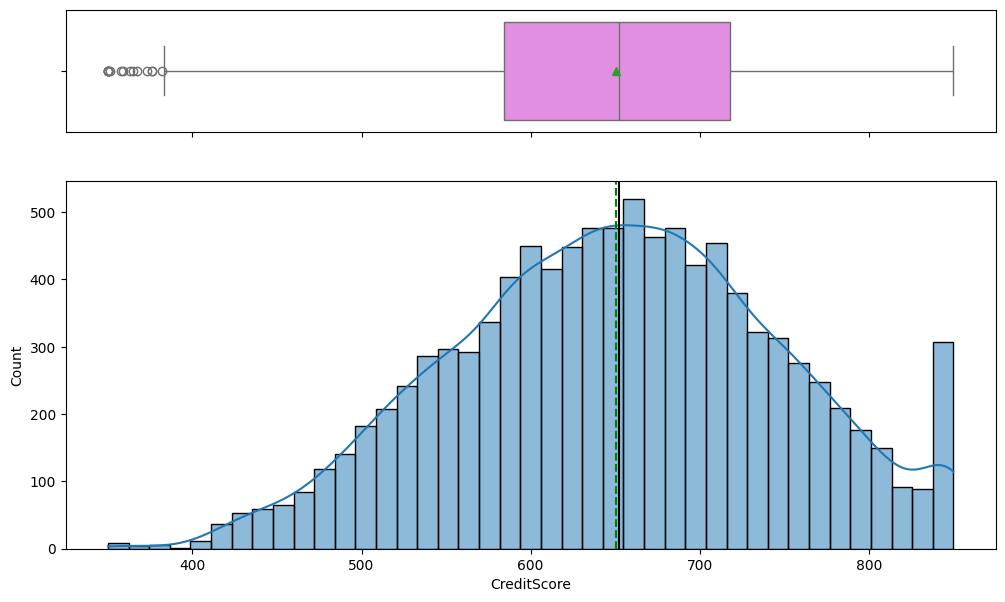

In [436]:
histogram_boxplot(df1, "CreditScore", kde=True)

Credit Score is normally distrivuted for this dataset. so we have normal representation based on Scpre

#### Geography

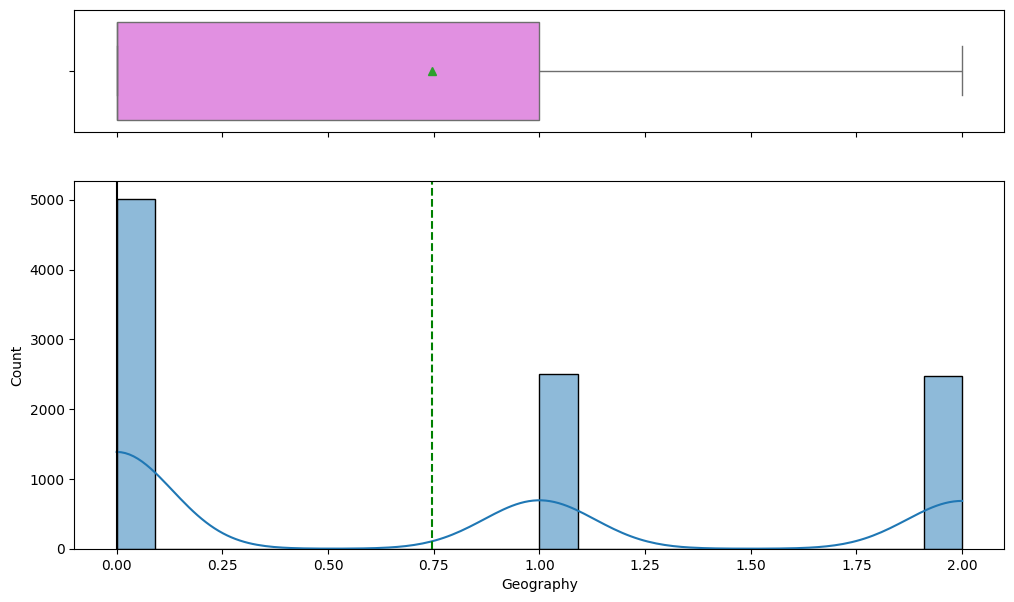

In [437]:
histogram_boxplot(df1, "Geography", kde=True)

Data is split evenly between 2 Geo Regions and then there is skewness for another region

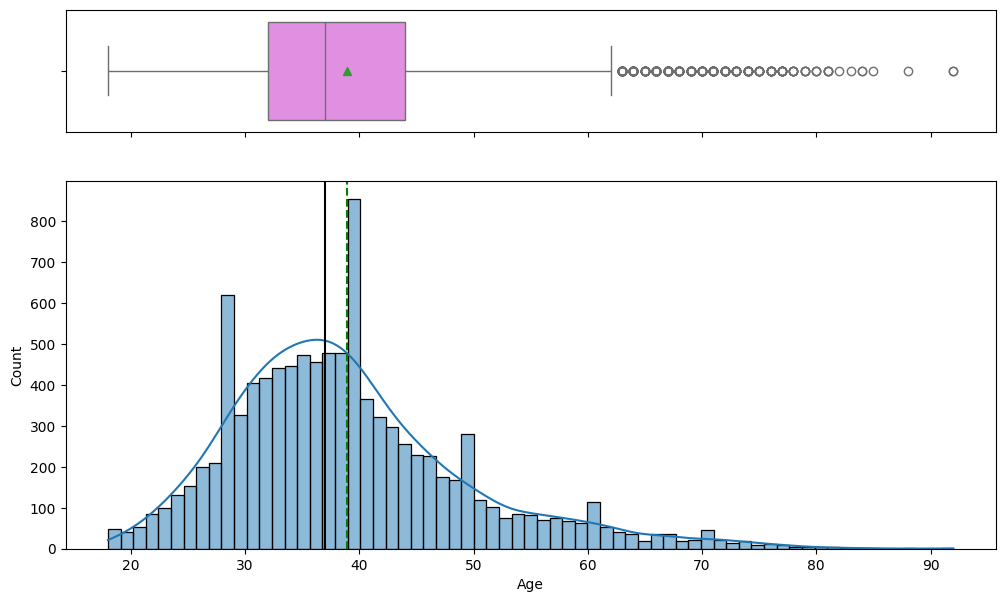

In [438]:
histogram_boxplot(df1, "Age", kde=True)

Normal Distrivtion by Age

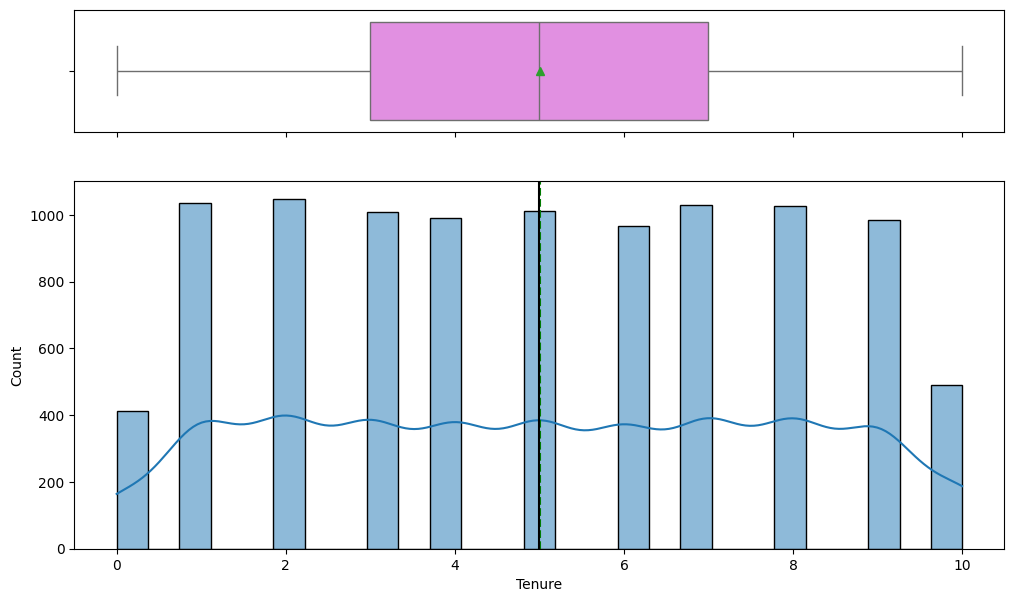

In [439]:
histogram_boxplot(df1, "Tenure", kde=True)

Tenure distrubtion is pretty even with lower numbers fr 0 and 10 years

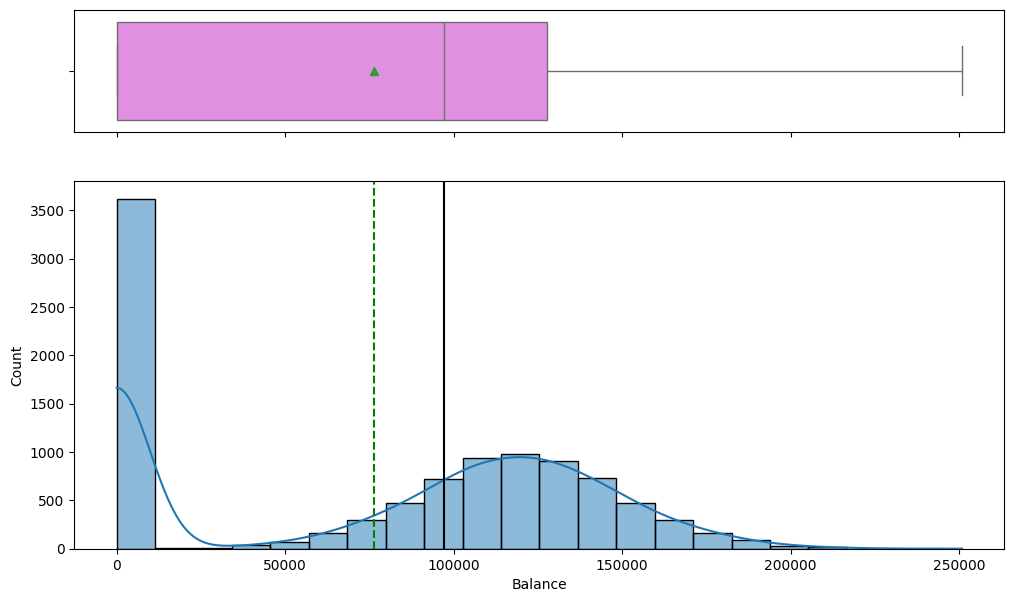

In [440]:
histogram_boxplot(df1, "Balance", kde=True)

lots of data with 0 Balance. from 50k to 200K there is normal distribution

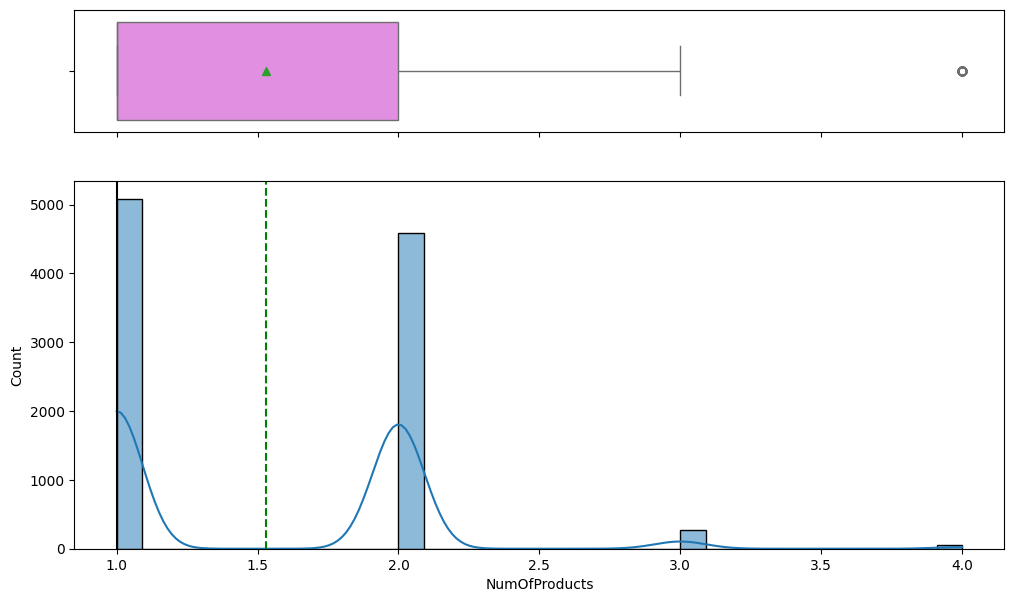

In [441]:
histogram_boxplot(df1, "NumOfProducts", kde=True)

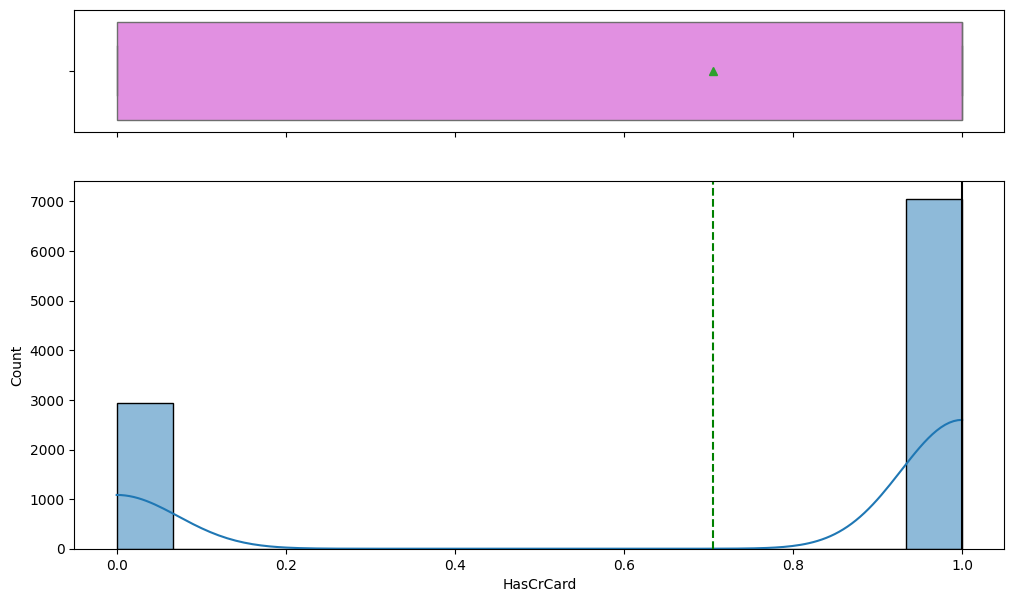

In [442]:
histogram_boxplot(df1, "HasCrCard", kde=True)

Lots of data where they have a credit card.

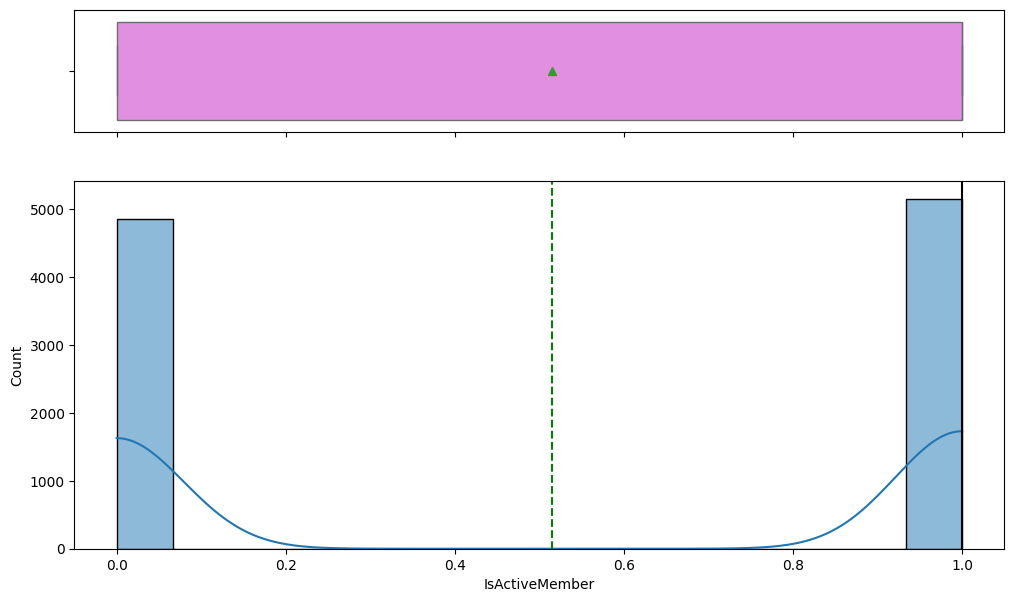

In [443]:
histogram_boxplot(df1, "IsActiveMember", kde=True)

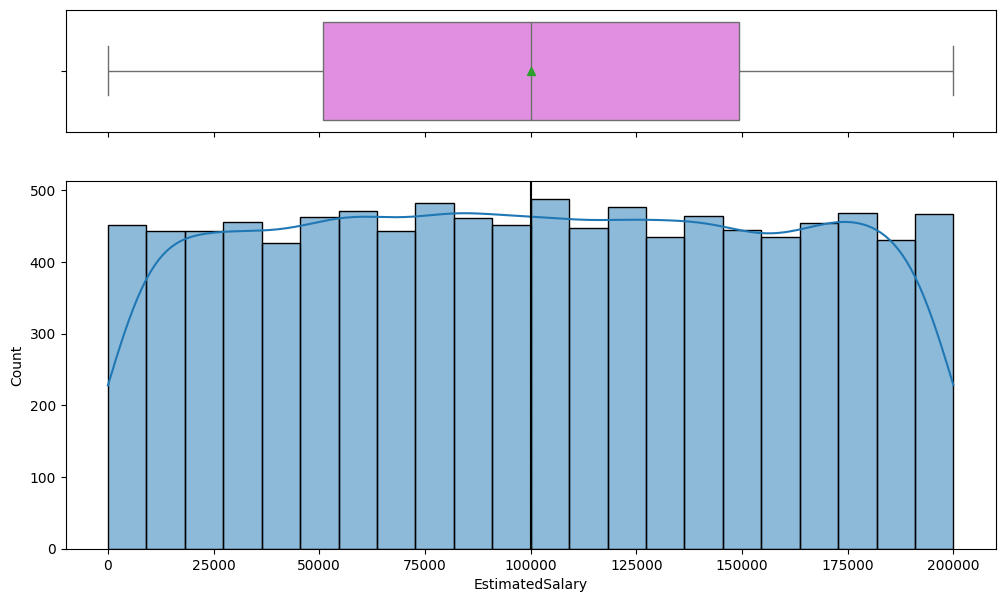

In [444]:
histogram_boxplot(df1, "EstimatedSalary", kde=True)

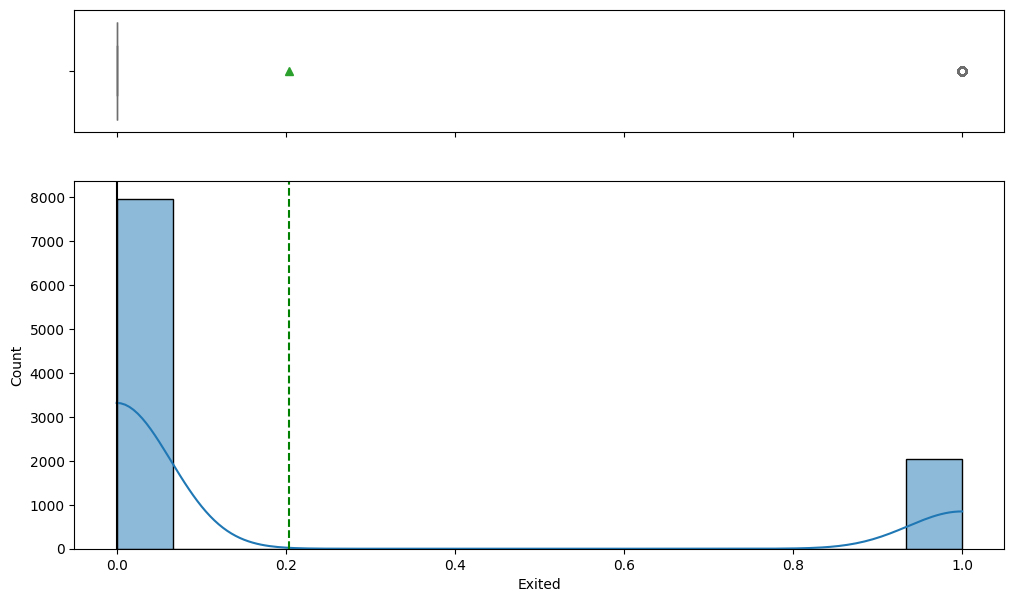

In [445]:
histogram_boxplot(df1, "Exited", kde=True)

The dataset is highly skewed as most data is Exited = 0 

### Bivariate Analysis

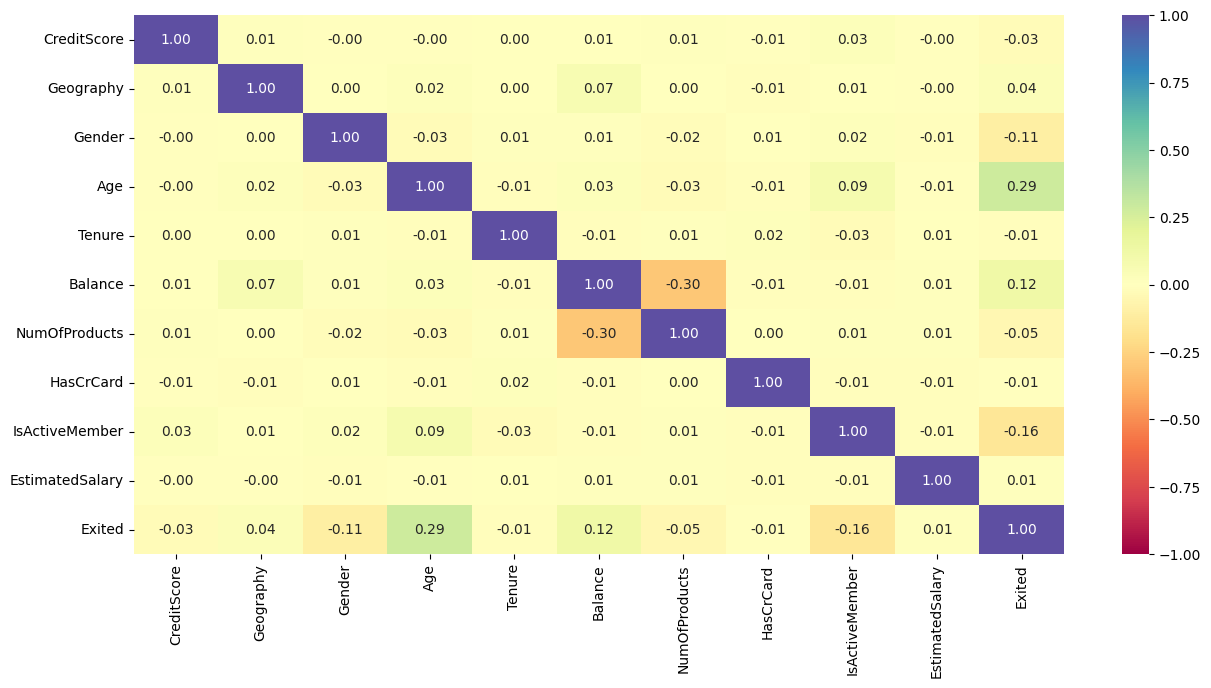

In [446]:
cols_list = df1.select_dtypes(include=np.number).columns.tolist()
# dropping Year as it is a temporal variable
# cols_list.remove("Year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

do not see a lot of high correl features

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


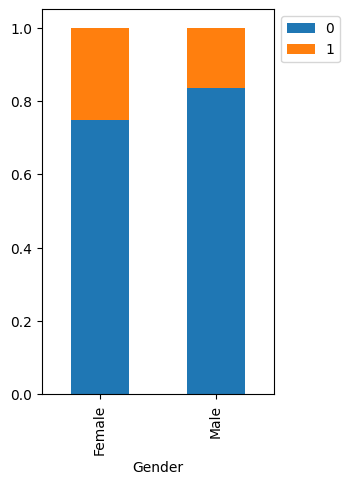

In [447]:
stacked_barplot(data, "Gender", "Exited")

Not a lot of variation of Exited based on Gender

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


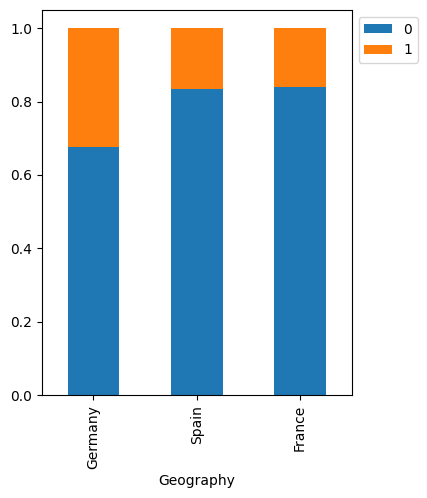

In [448]:
stacked_barplot(data, "Geography", "Exited")

Not a lot of variation based on Geography. Germany is lowest Exited 

Exited     0     1    All
Age                      
All     7963  2037  10000
46       135    91    226
40       343    89    432
43       209    88    297
45       142    87    229
..       ...   ...    ...
79         4     0      4
78         5     0      5
77        10     0     10
76        11     0     11
75         9     0      9

[71 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


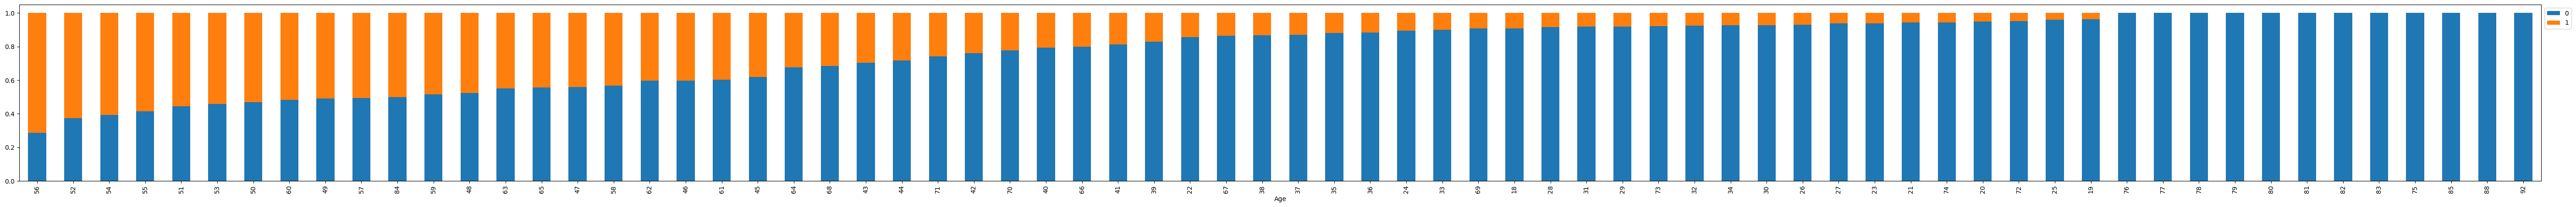

In [449]:
stacked_barplot(data, "Age", "Exited")

With variation in age there are  significant variations of Exited status

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


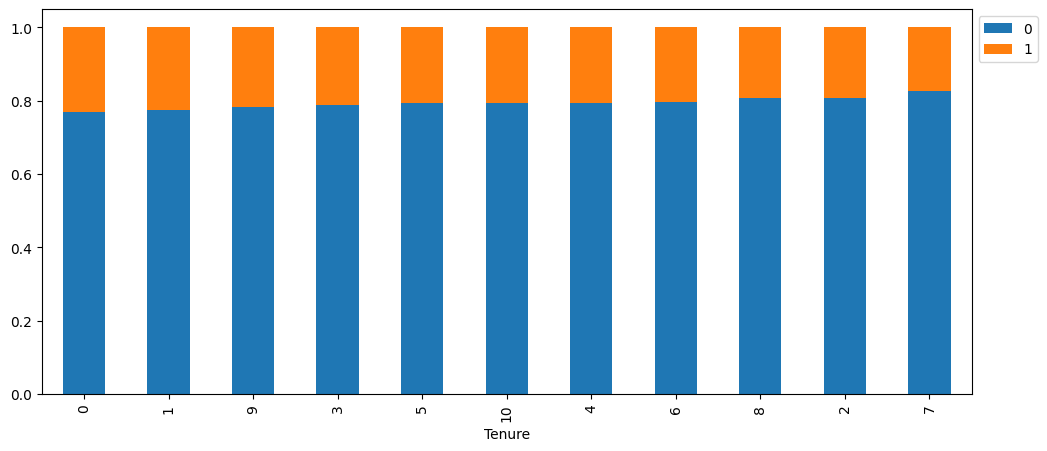

In [450]:
stacked_barplot(data, "Tenure", "Exited")

Not a lot of variation by Tenure

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


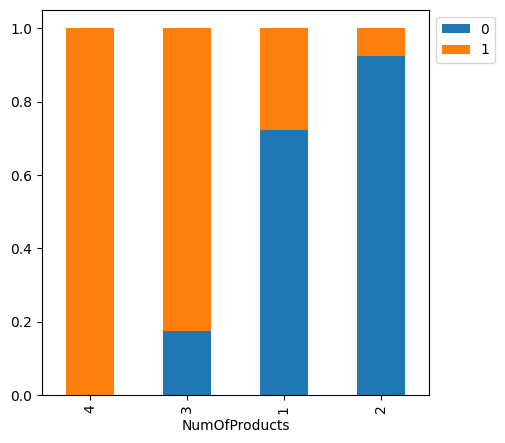

In [451]:
stacked_barplot(data, "NumOfProducts", "Exited")

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


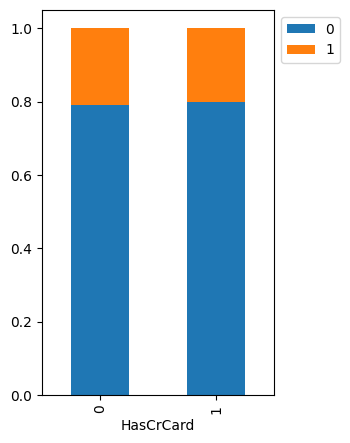

In [452]:
stacked_barplot(data, "HasCrCard", "Exited")

Not much variation by whether have credit card or not

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


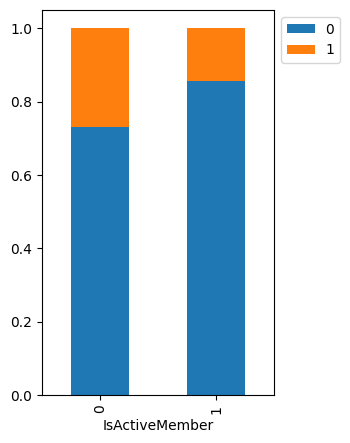

In [453]:
stacked_barplot(data, "IsActiveMember", "Exited")

Not much variation by whether have isActiveMember  or not

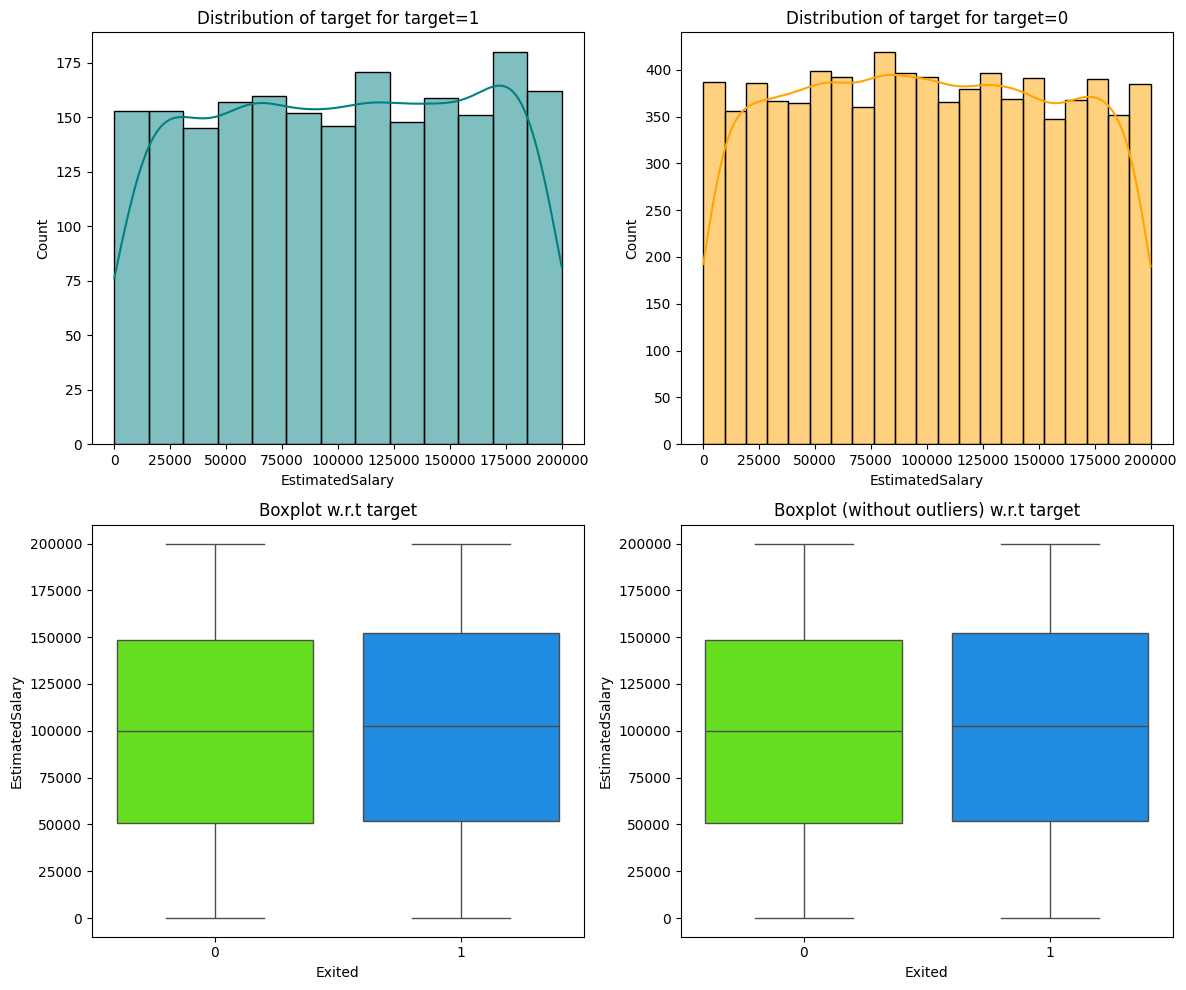

In [454]:
distribution_plot_wrt_target(data, "EstimatedSalary", "Exited")

## Data Preprocessing

In [455]:
## Separating Independent and Dependent Columns
X = data.drop(["Exited"], axis=1)
Y = data["Exited"]

### Dummy Variable Creation

In [456]:
# Encoding the categorical variables using one-hot encoding
X = pd.get_dummies(
    data,
    columns=["Gender", "Geography", "HasCrCard", "IsActiveMember"],
    drop_first=True,
)

In [457]:
# Standardizing the numerical variables to zero mean and unit variance.
transformer = StandardScaler()
X[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]] = (
    transformer.fit_transform(
        X[
            [
                "CreditScore",
                "Age",
                "Tenure",
                "Balance",
                "NumOfProducts",
                "EstimatedSalary",
            ]
        ]
    )
)

In [458]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Exited', 'Gender_Male', 'Geography_Germany',
       'Geography_Spain', 'HasCrCard_1', 'IsActiveMember_1'],
      dtype='object')

In [459]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain,HasCrCard_1,IsActiveMember_1
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,1,False,False,False,True,True
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0,False,False,True,False,True
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,1,False,False,False,True,False
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,False,False,False,False,False
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,0,False,False,True,True,True


In [460]:
X = np.asarray(X).astype(np.float32)

### Train-validation-test Split

In [461]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

In [462]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [463]:
# Printing the shapes.
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(6400, 12) (6400,)
(1600, 12) (1600,)
(2000, 12) (2000,)


In [464]:
print(y_train.shape, y_valid.shape, y_test.shape)

(6400,) (1600,) (2000,)


### Data Normalization

## Model Building

### Model Evaluation Criterion

**A model can make wrong predictions in the following ways:**
* Predicting a customer will leave the bank in the next 6 months but they do not leave..
* Predicting a customer will NOT leave the bank    in the next 6 months but they DO leave..

**Which case is more important?**

Predicting a customer will NOT leave the bank    in the next 6 months but they DO leave is More Important. 
Bank cares about retaining the customer and so it is important that we do not make wrong prediction of NOT Leaving while they actually leave

**How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

So we want to reduce False Negative. Hence Recall is important in this scenario



As we have are dealing with an imbalance in class distribution, we will be using class weights to allow the model to give proportionally more importance to the minority class.

In [465]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

#### Utility Functions

In [466]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots()  # Creating a subplot with figure and axes.
    plt.plot(history.history[name])  # Plotting the train accuracy or train loss
    plt.plot(
        history.history["val_" + name]
    )  # Plotting the validation accuracy or validation loss

    plt.title("Model " + name.capitalize())  # Defining the title of the plot.
    plt.ylabel(name.capitalize())  # Capitalizing the first letter.
    plt.xlabel("Epoch")  # Defining the label for the x-axis.
    fig.legend(
        ["Train", "Validation"], loc="outside right upper"
    )  # Defining the legend, loc controls the position of the legend.

In [467]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average="weighted")  # to compute Recall
    precision = precision_score(
        target, pred, average="weighted"
    )  # to compute Precision
    f1 = f1_score(target, pred, average="weighted")  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1 Score": f1,
        },
        index=[0],
    )

    return df_perf

In [468]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [469]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### NN SGD Optimizer

In [470]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

In [471]:
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [472]:
# Initializing the neural network
model_0 = Sequential()
model_0.add(Dense(14, activation="relu", input_dim=X_train.shape[1]))
model_0.add(Dense(7, activation="relu"))
model_0.add(Dense(1, activation="sigmoid"))

In [473]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                182       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 295 (1.15 KB)
Trainable params: 295 (1.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [474]:
optimizer = tf.keras.optimizers.SGD(0.001)  # defining SGD as the optimizer to be used
metric = keras.metrics.Recall()
model_0.compile(loss="binary_crossentropy", optimizer=optimizer,metrics=[metric])


In [475]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                182       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 295 (1.15 KB)
Trainable params: 295 (1.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [476]:
import time

start = time.time()

history_0 = model_0.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=batch_size,
    epochs=epochs,
    class_weight=cw_dict,
)
end = time.time()

Epoch 1/25
100/100 [==============================] - 0s 2ms/step - loss: 1.2662 - recall: 0.9716 - val_loss: 0.7302 - val_recall: 0.9601
Epoch 2/25
100/100 [==============================] - 0s 1ms/step - loss: 1.2285 - recall: 0.9555 - val_loss: 0.6952 - val_recall: 0.9479
Epoch 3/25
100/100 [==============================] - 0s 1ms/step - loss: 1.1955 - recall: 0.9294 - val_loss: 0.6654 - val_recall: 0.9202
Epoch 4/25
100/100 [==============================] - 0s 1ms/step - loss: 1.1664 - recall: 0.9141 - val_loss: 0.6395 - val_recall: 0.9018
Epoch 5/25
100/100 [==============================] - 0s 1ms/step - loss: 1.1396 - recall: 0.9011 - val_loss: 0.6162 - val_recall: 0.8926
Epoch 6/25
100/100 [==============================] - 0s 1ms/step - loss: 1.1143 - recall: 0.8865 - val_loss: 0.5958 - val_recall: 0.8834
Epoch 7/25
100/100 [==============================] - 0s 1ms/step - loss: 1.0901 - recall: 0.8765 - val_loss: 0.5773 - val_recall: 0.8712
Epoch 8/25
100/100 [==============

In [477]:
print("Time taken in seconds ", end - start)

Time taken in seconds  3.235024929046631


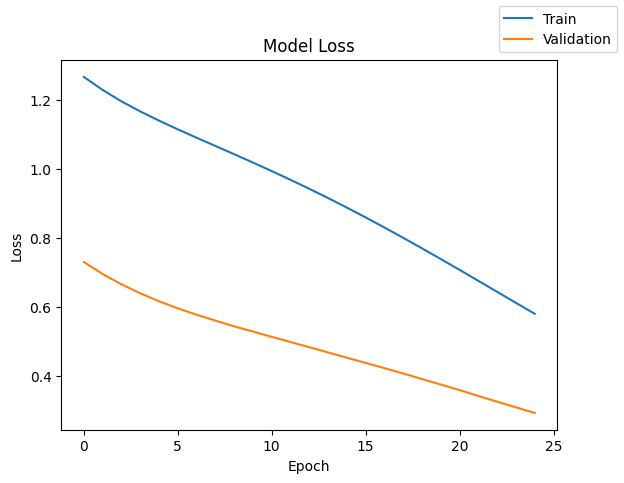

In [478]:
plot(history_0, "loss")

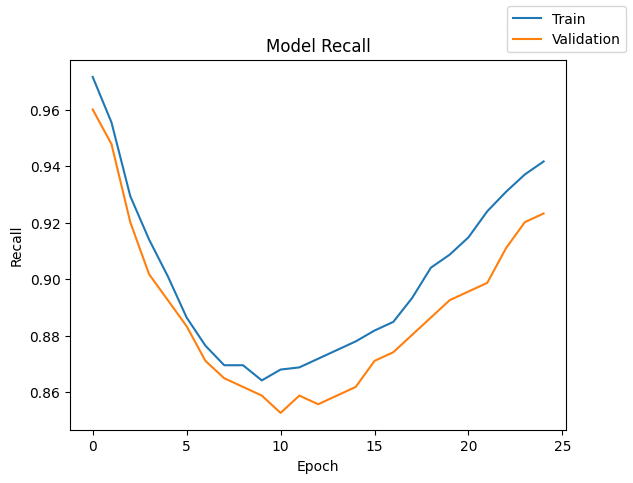

In [479]:
plot(history_0, "recall")

In [480]:
model_0_train_perf = model_performance_classification(model_0, X_train, y_train)
model_0_train_perf

200/200 [==============================] - 0s 578us/step


,Accuracy,Recall,Precision,F1 Score
0,0.933281,0.933281,0.942422,0.93558


In [481]:
model_0_valid_perf = model_performance_classification(model_0, X_valid, y_valid)
model_0_valid_perf

50/50 [==============================] - 0s 575us/step


,Accuracy,Recall,Precision,F1 Score
0,0.929375,0.929375,0.93747,0.931591


In [482]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 561us/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [483]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_valid)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 552us/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [484]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_valid, y_val_pred)

In [485]:
#classification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      5096
           1       0.78      0.94      0.85      1304

    accuracy                           0.93      6400
   macro avg       0.88      0.94      0.90      6400
weighted avg       0.94      0.93      0.94      6400



In [486]:
#classification report
cr=classification_report(y_valid, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1274
           1       0.77      0.92      0.84       326

    accuracy                           0.93      1600
   macro avg       0.88      0.93      0.90      1600
weighted avg       0.94      0.93      0.93      1600



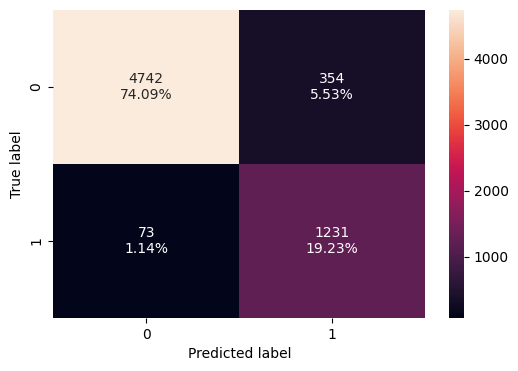

In [487]:
make_confusion_matrix(y_train, y_train_pred)

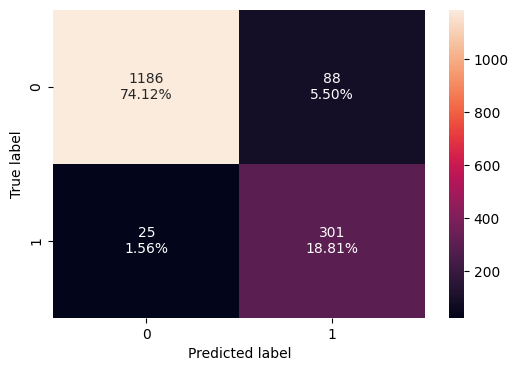

In [488]:
make_confusion_matrix(y_valid, y_val_pred)    ## Complete the code to check the model's performance on the validation set

## Model Performance Improvement

### NN Adam Optimizer

In [489]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [579]:
# Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(14, activation="relu", input_dim=X_train.shape[1]))
model_1.add(Dense(7, activation="relu"))
model_1.add(Dense(1, activation="sigmoid"))

In [491]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                182       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 295 (1.15 KB)
Trainable params: 295 (1.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [492]:
optimizer = tf.keras.optimizers.Adam(0.001)  # defining Adam as the optimizer to be used
metric = keras.metrics.Recall()

model_1.compile(loss="binary_crossentropy", optimizer=optimizer,metrics=[metric])

In [493]:
start = time.time()
history_1 = model_1.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=batch_size,
    epochs=epochs,
    class_weight=cw_dict,
)
end = time.time()

Epoch 1/25
100/100 [==============================] - 1s 2ms/step - loss: 1.0802 - recall: 0.9287 - val_loss: 0.4903 - val_recall: 0.8926
Epoch 2/25
100/100 [==============================] - 0s 1ms/step - loss: 0.6876 - recall: 0.9471 - val_loss: 0.2651 - val_recall: 0.9663
Epoch 3/25
100/100 [==============================] - 0s 1ms/step - loss: 0.3390 - recall: 0.9847 - val_loss: 0.1321 - val_recall: 1.0000
Epoch 4/25
100/100 [==============================] - 0s 1ms/step - loss: 0.1483 - recall: 0.9969 - val_loss: 0.0605 - val_recall: 1.0000
Epoch 5/25
100/100 [==============================] - 0s 1ms/step - loss: 0.0705 - recall: 0.9992 - val_loss: 0.0320 - val_recall: 1.0000
Epoch 6/25
100/100 [==============================] - 0s 1ms/step - loss: 0.0387 - recall: 1.0000 - val_loss: 0.0195 - val_recall: 1.0000
Epoch 7/25
100/100 [==============================] - 0s 1ms/step - loss: 0.0241 - recall: 1.0000 - val_loss: 0.0130 - val_recall: 1.0000
Epoch 8/25
100/100 [==============

In [494]:
print("Time taken in seconds ", end - start)

Time taken in seconds  3.4653186798095703


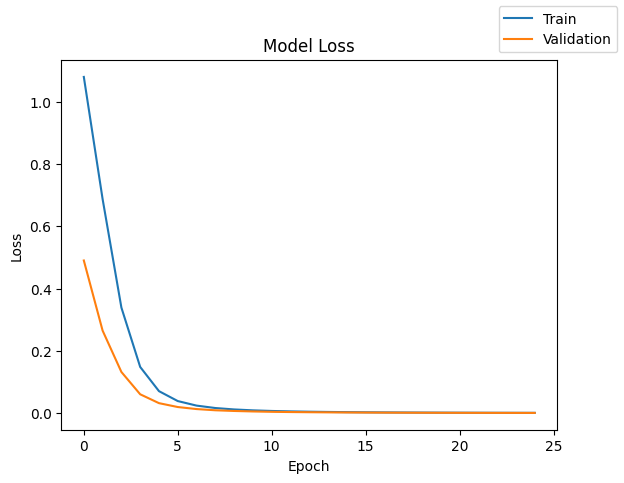

In [495]:
plot(history_1, "loss")

In [578]:
model_1_train_perf = model_performance_classification(model_1, X_train, y_train)
model_1_train_perf

200/200 [==============================] - 0s 631us/step


,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


In [497]:
model_1_valid_perf = model_performance_classification(model_1, X_valid, y_valid)
model_1_valid_perf

50/50 [==============================] - 0s 545us/step


,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


In [498]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 687us/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [499]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_valid)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 600us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [500]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_valid,y_val_pred)

In [501]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5096
           1       1.00      1.00      1.00      1304

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400



In [502]:
#classification report
cr=classification_report(y_valid,y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00       326

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



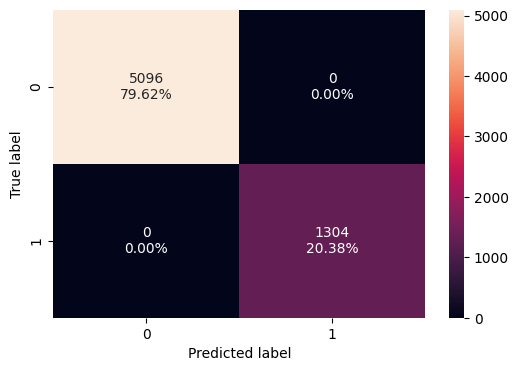

In [503]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

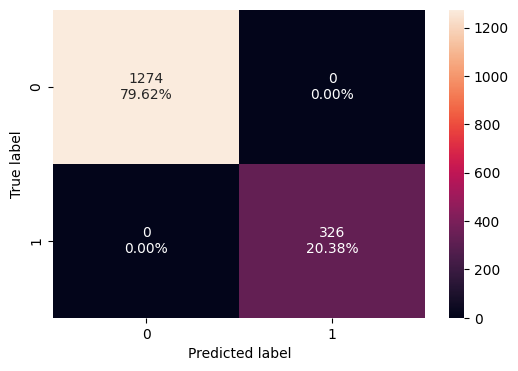

In [504]:
#Calculating the confusion matrix
make_confusion_matrix(y_valid,y_val_pred)

### NN Adam Optimizer and Dropout

In [505]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [506]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(14,activation='relu',input_dim = X_train.shape[1]))
# Complete the code to add dropout with ratio of 0.2 or any suitable value.
model_2.add(Dropout(0.4))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(7,activation='relu'))
model_2.add(Dropout(0.2))

# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
# Complete the code to add the number of neurons required in the output layer.
model_2.add(Dense(1, activation = 'sigmoid'))

In [507]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                182       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 295 (1.15 KB)
Trainable params: 295 (1.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [508]:
optimizer = tf.keras.optimizers.Adam()  # defining Adam as the optimizer to be used
model_2.compile(loss="binary_crossentropy", optimizer=optimizer)

In [509]:
start = time.time()

history_2 = model_2.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=batch_size,
    epochs=epochs,
    class_weight=cw_dict,
)
end = time.time()

Epoch 1/25
100/100 [==============================] - 1s 2ms/step - loss: 1.2513 - val_loss: 0.5313
Epoch 2/25
100/100 [==============================] - 0s 1ms/step - loss: 1.0525 - val_loss: 0.3983
Epoch 3/25
100/100 [==============================] - 0s 1ms/step - loss: 0.8501 - val_loss: 0.2870
Epoch 4/25
100/100 [==============================] - 0s 1ms/step - loss: 0.6799 - val_loss: 0.1882
Epoch 5/25
100/100 [==============================] - 0s 1ms/step - loss: 0.5062 - val_loss: 0.1185
Epoch 6/25
100/100 [==============================] - 0s 1ms/step - loss: 0.3698 - val_loss: 0.0720
Epoch 7/25
100/100 [==============================] - 0s 1ms/step - loss: 0.3035 - val_loss: 0.0543
Epoch 8/25
100/100 [==============================] - 0s 1ms/step - loss: 0.2511 - val_loss: 0.0387
Epoch 9/25
100/100 [==============================] - 0s 1ms/step - loss: 0.2061 - val_loss: 0.0295
Epoch 10/25
100/100 [==============================] - 0s 1ms/step - loss: 0.1711 - val_loss: 0.0227

In [510]:
print("Time taken in seconds ", end - start)

Time taken in seconds  3.4157087802886963


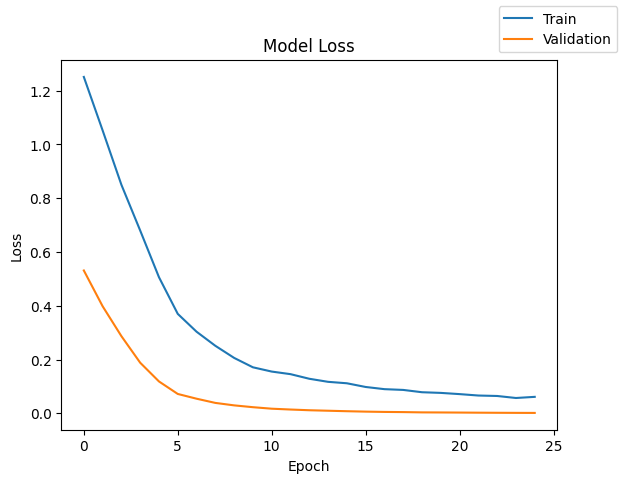

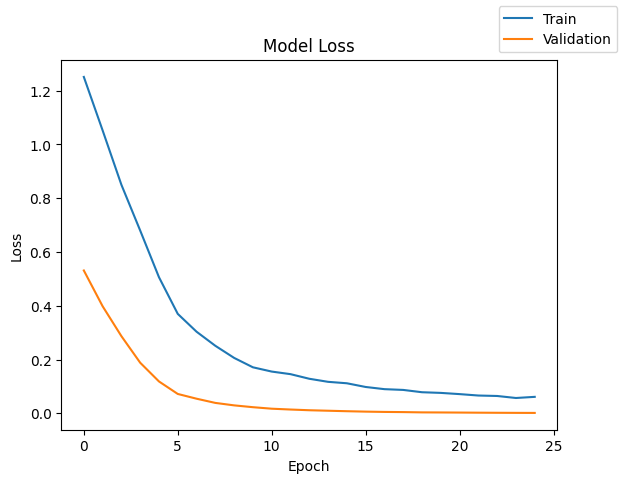

In [511]:
plot(history_2, "loss")
plot(history_2, "loss")

In [512]:
model_2_train_perf = model_performance_classification(model_2, X_train, y_train)
model_2_train_perf

200/200 [==============================] - 0s 616us/step


,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


In [513]:
model_2_valid_perf = model_performance_classification(model_2, X_valid, y_valid)
model_2_valid_perf

50/50 [==============================] - 0s 591us/step


,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


In [514]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 553us/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [515]:
#Predicting the results using best as a threshold
y_val_pred = model_2.predict(X_valid)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 598us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [516]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_valid,y_val_pred)

In [517]:
#classification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5096
           1       1.00      1.00      1.00      1304

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400



In [518]:
#classification report
cr=classification_report(y_valid, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00       326

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



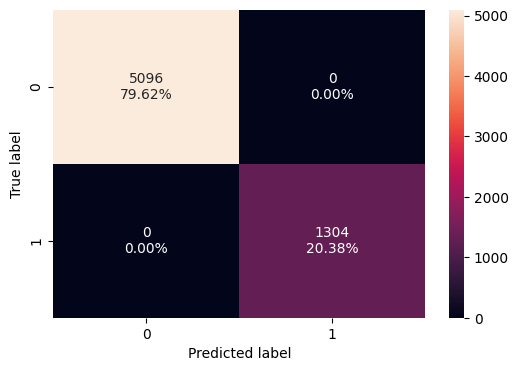

In [519]:
make_confusion_matrix(y_train, y_train_pred)

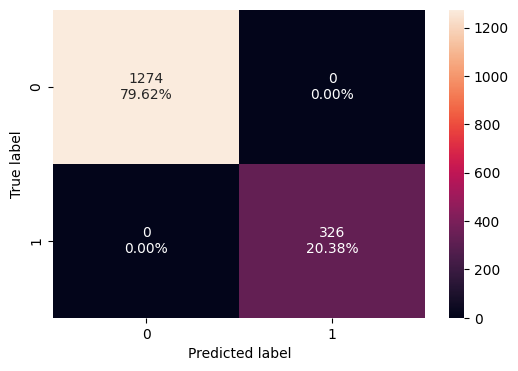

In [520]:
make_confusion_matrix(y_valid, y_val_pred)    ## Complete the code to check the model's performance on the validation set

### NN SMOTE and SGD Optimizer

In [521]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 12)
After UpSampling, the shape of train_y: (10192,) 



In [522]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

In [523]:
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [524]:
# Initializing the neural network
model_3 = Sequential()
model_3.add(Dense(14, activation="relu", input_dim=X_train_smote.shape[1]))
model_3.add(Dense(7, activation="relu"))
model_3.add(Dense(1, activation="sigmoid"))

In [525]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                182       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 295 (1.15 KB)
Trainable params: 295 (1.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [526]:
optimizer = tf.keras.optimizers.SGD(0.001)  # defining SGD as the optimizer to be used
metric = keras.metrics.Recall()
model_3.compile(loss="binary_crossentropy", optimizer=optimizer,metrics=[metric])


In [527]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                182       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 295 (1.15 KB)
Trainable params: 295 (1.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [528]:
import time

start = time.time()

history_3 = model_3.fit(
    X_train_smote,
    y_train_smote,
    validation_data=(X_valid, y_valid),
    batch_size=batch_size,
    epochs=epochs,
    class_weight=cw_dict,
)
end = time.time()

Epoch 1/25
160/160 [==============================] - 1s 2ms/step - loss: 1.4819 - recall: 0.9918 - val_loss: 0.8359 - val_recall: 0.9969
Epoch 2/25
160/160 [==============================] - 0s 1ms/step - loss: 1.3473 - recall: 0.9949 - val_loss: 0.8834 - val_recall: 1.0000
Epoch 3/25
160/160 [==============================] - 0s 1ms/step - loss: 1.2600 - recall: 0.9965 - val_loss: 0.9061 - val_recall: 1.0000
Epoch 4/25
160/160 [==============================] - 0s 1ms/step - loss: 1.1958 - recall: 0.9963 - val_loss: 0.9091 - val_recall: 1.0000
Epoch 5/25
160/160 [==============================] - 0s 1ms/step - loss: 1.1403 - recall: 0.9957 - val_loss: 0.8952 - val_recall: 1.0000
Epoch 6/25
160/160 [==============================] - 0s 995us/step - loss: 1.0876 - recall: 0.9949 - val_loss: 0.8670 - val_recall: 1.0000
Epoch 7/25
160/160 [==============================] - 0s 1ms/step - loss: 1.0345 - recall: 0.9941 - val_loss: 0.8345 - val_recall: 1.0000
Epoch 8/25
160/160 [============

In [529]:
print("Time taken in seconds ", end - start)

Time taken in seconds  4.571969509124756


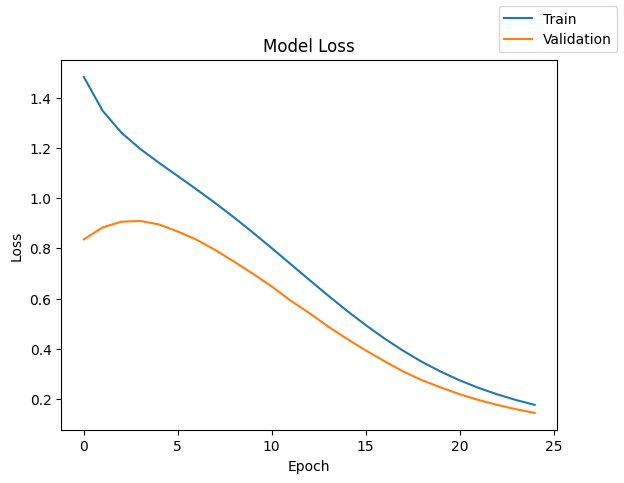

In [530]:
plot(history_3, "loss")

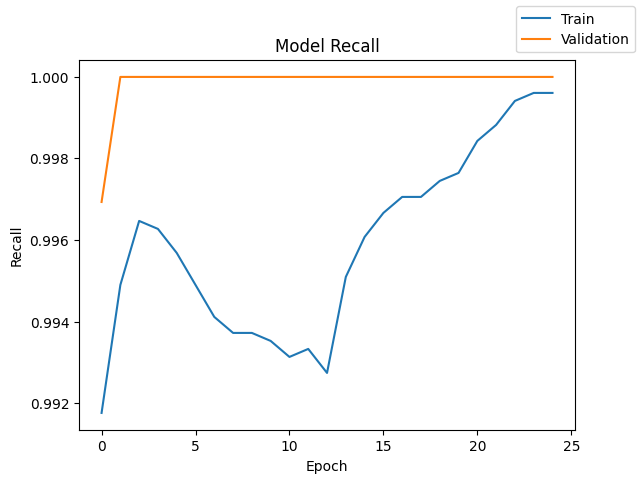

In [531]:
plot(history_3, "recall")

In [532]:
model_3_train_perf = model_performance_classification(model_3, X_train_smote, y_train_smote)
model_3_train_perf

319/319 [==============================] - 0s 561us/step


,Accuracy,Recall,Precision,F1 Score
0,0.991268,0.991268,0.991404,0.991267


In [533]:
model_3_valid_perf = model_performance_classification(model_3, X_valid, y_valid)
model_3_valid_perf

50/50 [==============================] - 0s 649us/step


,Accuracy,Recall,Precision,F1 Score
0,0.98625,0.98625,0.987119,0.986415


In [534]:
#Predicting the results using best as a threshold
y_train_pred = model_3.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 0s 593us/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [535]:
#Predicting the results using best as a threshold
y_val_pred = model_3.predict(X_valid)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 590us/step


array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [536]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_valid, y_val_pred)

In [537]:
#classification report
cr = classification_report(y_train_smote, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5096
           1       0.98      1.00      0.99      5096

    accuracy                           0.99     10192
   macro avg       0.99      0.99      0.99     10192
weighted avg       0.99      0.99      0.99     10192



In [538]:
#classification report
cr=classification_report(y_valid, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1274
           1       0.94      1.00      0.97       326

    accuracy                           0.99      1600
   macro avg       0.97      0.99      0.98      1600
weighted avg       0.99      0.99      0.99      1600



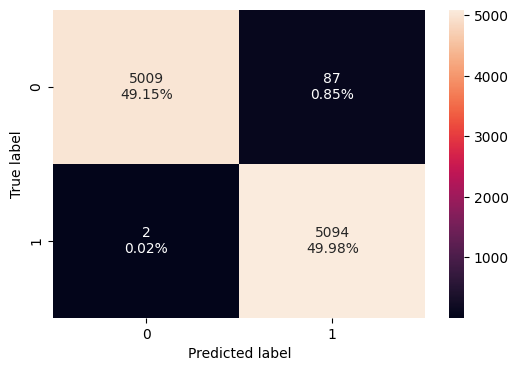

In [539]:
make_confusion_matrix(y_train_smote, y_train_pred)

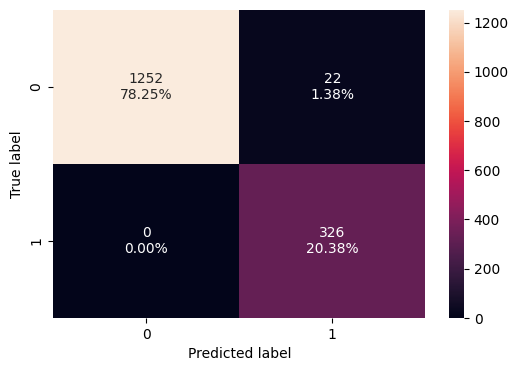

In [540]:
make_confusion_matrix(y_valid, y_val_pred)    ## Complete the code to check the model's performance on the validation set

### NN  SMOTE and Adam Optimizer

In [541]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [542]:
# Initializing the neural network
model_4 = Sequential()
model_4.add(Dense(14, activation="relu", input_dim=X_train_smote.shape[1]))
model_4.add(Dense(7, activation="relu"))
model_4.add(Dense(1, activation="sigmoid"))

In [543]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                182       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 295 (1.15 KB)
Trainable params: 295 (1.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [544]:
optimizer = tf.keras.optimizers.Adam()  # defining SGD as the optimizer to be used
metric = keras.metrics.Recall()
model_4.compile(loss="binary_crossentropy", optimizer=optimizer,metrics=[metric])


In [545]:
start = time.time()
history_4 = model_4.fit(
    X_train_smote,
    y_train_smote,
    validation_data=(X_valid, y_valid),
    batch_size=batch_size,
    epochs=epochs,
    class_weight=cw_dict,
)
end = time.time()

Epoch 1/25
160/160 [==============================] - 1s 2ms/step - loss: 1.1209 - recall: 0.9923 - val_loss: 0.6010 - val_recall: 0.9969
Epoch 2/25
160/160 [==============================] - 0s 1ms/step - loss: 0.4412 - recall: 0.9976 - val_loss: 0.1876 - val_recall: 1.0000
Epoch 3/25
160/160 [==============================] - 0s 1ms/step - loss: 0.1237 - recall: 1.0000 - val_loss: 0.0567 - val_recall: 1.0000
Epoch 4/25
160/160 [==============================] - 0s 1ms/step - loss: 0.0431 - recall: 1.0000 - val_loss: 0.0255 - val_recall: 1.0000
Epoch 5/25
160/160 [==============================] - 0s 1ms/step - loss: 0.0205 - recall: 1.0000 - val_loss: 0.0142 - val_recall: 1.0000
Epoch 6/25
160/160 [==============================] - 0s 1ms/step - loss: 0.0118 - recall: 1.0000 - val_loss: 0.0087 - val_recall: 1.0000
Epoch 7/25
160/160 [==============================] - 0s 1ms/step - loss: 0.0076 - recall: 1.0000 - val_loss: 0.0060 - val_recall: 1.0000
Epoch 8/25
160/160 [==============

In [546]:
print("Time taken in seconds ", end - start)

Time taken in seconds  5.092024087905884


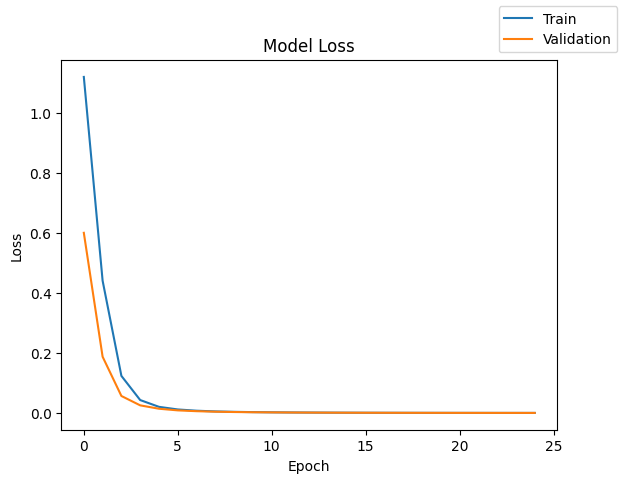

In [547]:
plot(history_4, "loss")

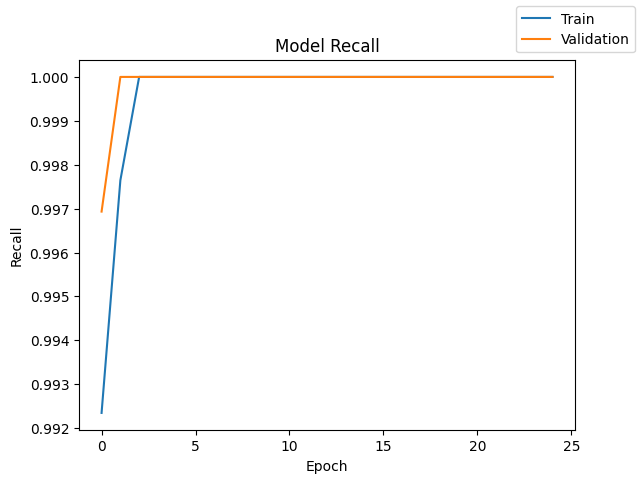

In [548]:
plot(history_4, "recall")

In [549]:
model_4_train_perf = model_performance_classification(model_4, X_train_smote, y_train_smote)
model_4_train_perf

319/319 [==============================] - 0s 581us/step


,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


In [550]:
model_4_valid_perf = model_performance_classification(model_4, X_valid, y_valid)
model_4_valid_perf

50/50 [==============================] - 0s 602us/step


,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


In [551]:
#Predicting the results using best as a threshold
y_train_pred = model_4.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 0s 576us/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [552]:
#Predicting the results using best as a threshold
y_val_pred = model_4.predict(X_valid)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 516us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [553]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_valid,y_val_pred)

In [554]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5096
           1       1.00      1.00      1.00      5096

    accuracy                           1.00     10192
   macro avg       1.00      1.00      1.00     10192
weighted avg       1.00      1.00      1.00     10192



In [555]:
#classification report
cr=classification_report(y_valid, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00       326

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



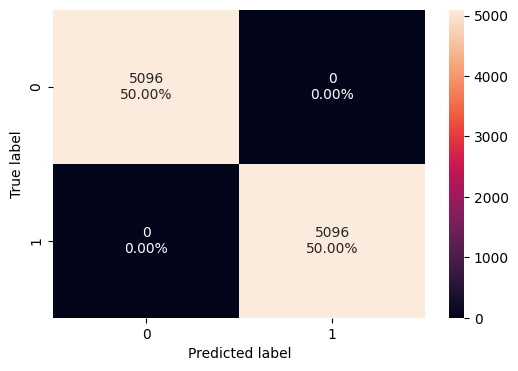

In [556]:
make_confusion_matrix(y_train_smote, y_train_pred)

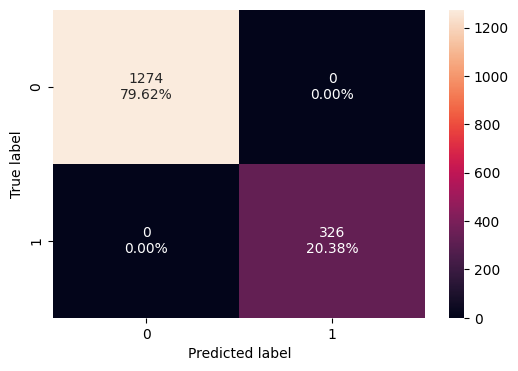

In [557]:
make_confusion_matrix(y_valid, y_val_pred)    ## Complete the code to check the model's performance on the validation set

### NN SMOTE, Adam Optimizer, and Dropout

In [558]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [559]:
#Initializing the neural network
model_5 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_5.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
# Complete the code to add dropout with ratio of 0.2 or any suitable value.
model_5.add(Dropout(0.4))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_5.add(Dense(7,activation='relu'))
# Complete the code to add dropout with ratio of 0.1 or any suitable value.
model_5.add(Dropout(0.2))
# Complete the code to add the number of neurons required in the output layer.
model_5.add(Dense(1, activation = 'sigmoid'))

In [560]:
optimizer = tf.keras.optimizers.Adam()  # defining SGD as the optimizer to be used
metric = keras.metrics.Recall()
model_5.compile(loss="binary_crossentropy", optimizer=optimizer,metrics=[metric])


In [561]:
start = time.time()

history_5 = model_5.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=batch_size,
    epochs=epochs,
    class_weight=cw_dict,
)
end = time.time()

Epoch 1/25
100/100 [==============================] - 1s 2ms/step - loss: 1.3436 - recall: 0.8712 - val_loss: 0.6368 - val_recall: 0.9479
Epoch 2/25
100/100 [==============================] - 0s 1ms/step - loss: 1.0902 - recall: 0.8873 - val_loss: 0.4488 - val_recall: 0.9724
Epoch 3/25
100/100 [==============================] - 0s 1ms/step - loss: 0.7438 - recall: 0.9210 - val_loss: 0.2295 - val_recall: 0.9939
Epoch 4/25
100/100 [==============================] - 0s 1ms/step - loss: 0.4493 - recall: 0.9640 - val_loss: 0.1089 - val_recall: 1.0000
Epoch 5/25
100/100 [==============================] - 0s 1ms/step - loss: 0.2670 - recall: 0.9862 - val_loss: 0.0516 - val_recall: 1.0000
Epoch 6/25
100/100 [==============================] - 0s 1ms/step - loss: 0.1952 - recall: 0.9893 - val_loss: 0.0332 - val_recall: 1.0000
Epoch 7/25
100/100 [==============================] - 0s 1ms/step - loss: 0.1544 - recall: 0.9954 - val_loss: 0.0216 - val_recall: 1.0000
Epoch 8/25
100/100 [==============

In [562]:
print("Time taken in seconds ", end - start)

Time taken in seconds  3.6079986095428467


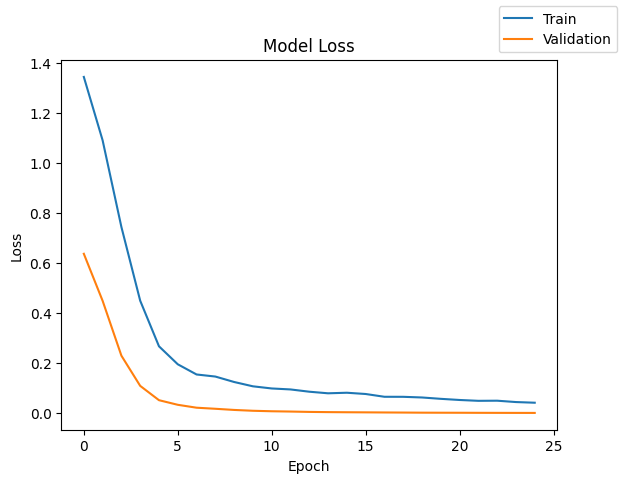

In [563]:
plot(history_5, "loss")

In [564]:
# plot(history_5, "recall")

In [565]:
model_5_train_perf = model_performance_classification(model_2, X_train_smote, y_train_smote)
model_5_train_perf

319/319 [==============================] - 0s 576us/step


,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


In [566]:
model_5_valid_perf = model_performance_classification(model_2, X_valid, y_valid)
model_5_valid_perf

50/50 [==============================] - 0s 612us/step


,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


In [567]:
#Predicting the results using best as a threshold
y_train_pred = model_5.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 0s 572us/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [568]:
#Predicting the results using best as a threshold
y_val_pred = model_5.predict(X_valid)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 579us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [569]:
model_name = "NN with SMOTE/ Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_valid,y_val_pred)

In [570]:
#classification report
cr = classification_report(y_train_smote, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5096
           1       1.00      1.00      1.00      5096

    accuracy                           1.00     10192
   macro avg       1.00      1.00      1.00     10192
weighted avg       1.00      1.00      1.00     10192



In [571]:
#classification report
cr=classification_report(y_valid, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00       326

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



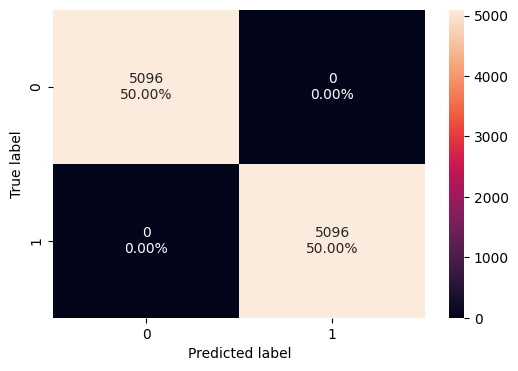

In [572]:
make_confusion_matrix(y_train_smote, y_train_pred)

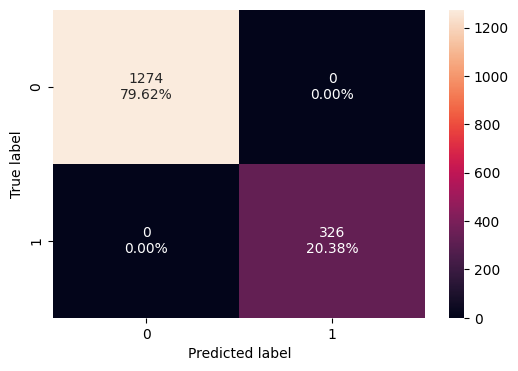

In [573]:
make_confusion_matrix(y_valid, y_val_pred)    ## Complete the code to check the model's performance on the validation set

## Model Performance Comparison and Final Model Selection

In [574]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.944018
NN with Adam,1.000000
NN with Adam & Dropout,1.000000
NN with SMOTE & SGD,0.999608
NN with SMOTE & Adam,1.000000
NN with SMOTE/ Adam & Dropout,1.000000


In [575]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.923313
NN with Adam,1.000000
NN with Adam & Dropout,1.000000
NN with SMOTE & SGD,1.000000
NN with SMOTE & Adam,1.000000
NN with SMOTE/ Adam & Dropout,1.000000


In [576]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.020706
NN with Adam,0.000000
NN with Adam & Dropout,0.000000
NN with SMOTE & SGD,-0.000392
NN with SMOTE & Adam,0.000000
NN with SMOTE/ Adam & Dropout,0.000000


In [577]:
# y_test_pred = _____.predict(X_test)    ## Complete the code to specify the best model
# y_test_pred = (y_test_pred > 0.5)
# print(y_test_pred)

## Actionable Insights and Business Recommendations

*



<font size=6 color='blue'>Power Ahead</font>
___